# Assignment 4

### 1. 复习上课内容以及复现课程代码

在本部分，你需要复习上课内容和课程代码后，自己复现课程代码。

### 2. 回答一下理论题目

#### 1. What does a neuron compute?

Ans: 

A neuron is a function which maps a series of **x** variables into **y**. 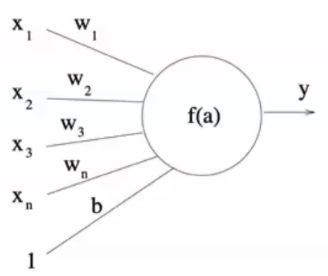

####  2. Why we use non-linear activation funcitons in neural networks?

Ans: 

Non-linear activation functions are used to generate non-linear outputs, they are often used in classification problems. 
Another reason to use non-linear activation functions is that when you want to pass some information to another neuron and you want it to be binary instead of continous, like the way a real neuron works in our brain. Examples are internal gates in LSTM: ![image.png](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1573832105&di=d85833fa01b238c0e75be651dfe3cf23&imgtype=jpg&er=1&src=http%3A%2F%2Fnooverfit.com%2Fwp%2Fwp-content%2Fuploads%2F2016%2F06%2F14585667357562.png)
It uses **sigmoid** and **tanh** function to pass a binary information into another neuron. 

#### 3. What is the 'Logistic Loss' ?

Logistic Loss is the loss function for logistic regression. According to ["Machine Learning"](https://www.coursera.org/learn/machine-learning/supplement/bgEt4/cost-function) by Andrew Ng: 
$$\begin{align*}& J(\theta) = \dfrac{1}{m} \sum_{i=1}^m \mathrm{Cost}(h_\theta(x^{(i)}),y^{(i)}) \newline & \mathrm{Cost}(h_\theta(x),y) = -\log(h_\theta(x)) \; & \text{if y = 1} \newline & \mathrm{Cost}(h_\theta(x),y) = -\log(1-h_\theta(x)) \; & \text{if y = 0}\end{align*}$$

According to our course，就是把两部分加起来:
$$LLoss = -\frac{1}{m}\sum_{i=1}^m y\log(\hat y)+(1-y)\log(1-\hat y)$$
当真值y=1时，loss为前半部分，当真值y=0时，loss为后半部分，
当y=1时，函数图像为：
![](https://d3c33hcgiwev3.cloudfront.net/imageAssetProxy.v1/Q9sX8nnxEeamDApmnD43Fw_1cb67ecfac77b134606532f5caf98ee4_Logistic_regression_cost_function_positive_class.png?expiry=1573344000000&hmac=cVPYNTS1XNea12MlBgkqa9b4HcQSMT5KrN5l3TvvIEo)
当y=0时，函数图像为：
![](https://d3c33hcgiwev3.cloudfront.net/imageAssetProxy.v1/Ut7vvXnxEead-BJkoDOYOw_f719f2858d78dd66d80c5ec0d8e6b3fa_Logistic_regression_cost_function_negative_class.png?expiry=1573344000000&hmac=cai5VXkiM6wzSKPDTbmzmdSH2bjCuAno4i135FWta0Q)

#### 4. Assume that you are building a binary classifier for detecting if an image containing cats, which activation functions would you recommend using for the output layer ?

A. ReLU    
B. Leaky ReLU    
C. sigmoid    
D. tanh  

Ans: 

C or D. According to the task, we want our output appear generally binary if we input different **X**s
With the function figures below, only C and D meets our requirement.

![Relu](https://img-blog.csdn.net/20180422215119237?watermark/2/text/aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L2Vkb2dhd2FjaGlh/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70)
![LeakyRelu](https://img-blog.csdn.net/20180422215128864?watermark/2/text/aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L2Vkb2dhd2FjaGlh/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70)
![tanh](https://img-blog.csdn.net/20180422215016370?watermark/2/text/aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L2Vkb2dhd2FjaGlh/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70)
![Sigmoid](https://img-blog.csdn.net/20180422214237627?watermark/2/text/aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L2Vkb2dhd2FjaGlh/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70)

#### 5. Why we don't use zero initialization for all parameters ?

Ans: 

Because it leads to a consequence of sync update of parameters. 

#### 6. Can you implement the softmax function using python ? 

$$Softmax_i = \frac{e^i}{\sum_j e^j}  \forall{j}$$

In [9]:
import numpy as np
arr = np.random.random(5)

def softmax(x):
    numerator = np.exp(x)
    denominator = np.exp(x).sum()
    return numerator/denominator

In [13]:
print(softmax([1,2,3,4]), softmax([1,2,3,4]).sum())

[0.0320586  0.08714432 0.23688282 0.64391426] 1.0


In [16]:
print(softmax([2,2,2,2]))

[0.25 0.25 0.25 0.25]


In [19]:
print(softmax([1,4,9,16]))

[3.05621658e-07 6.13857510e-06 9.11045323e-04 9.99082510e-01]


### 3.实践题

#### In this practical part, you will build a simple digits recognizer to check if the digit in the image is larger than 5. This assignmnet will guide you step by step to finish your first small project in this course .

#### 1 - Packages  
sklearn is a famous package for machine learning.   
matplotlib is a common package for vasualization.

In [20]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

C:\Users\yihua\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\yihua\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\yihua\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\yihua\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\yihua\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 19

#### 2 - Overvie of the dataset  
    - a training set has m_train images labeled as 0 if the digit < 5 or 1 if the digit >= 5
    - a test set contains m_test images labels as if the digit < 5 or 1 if the digit >= 5
    - eah image if of shape (num_px, num_px ). Thus, each image is square(height=num_px and  width = num_px)

In [252]:
# Loading the data 
digits = datasets.load_digits()

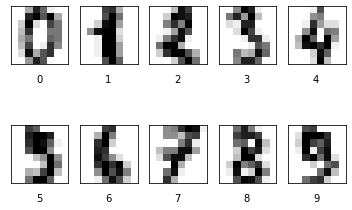

In [253]:
# Vilizating the data
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(digits.data[i-1].reshape([8,8]), cmap=plt.cm.gray_r)
    plt.text(3,10,str(digits.target[i-1]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [254]:
# Split the data into training set and test set 
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.25)

In [255]:
# reformulate the label. 
# If the digit is smaller than 5, the label is 0.
# If the digit is larger than 5, the label is 1.

y_train[y_train < 5 ] = 0
y_train[y_train >= 5] = 1
y_test[y_test < 5] = 0
y_test[y_test >= 5] = 1

In [256]:
y_train.resize((y_train.shape[0],1))
y_test.resize((y_test.shape[0],1))

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1347, 64)
(450, 64)
(1347, 1)
(450, 1)


行数：样本，列数：像素。

行数：标签

#### 3- Architecture of the neural network

![title](network.png)

In [48]:
!pwd

'pwd' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


##### Mathematical expression of the algorithm:

For one example $x^{(i)}$:   
 $$ z^{(i)} = w^T * x^{(i)} +b $$   
 $$ y^{(i)} = a^{(i)} = sigmoid(z^{(i)})$$   
 $$L(a^{(i)},y^{(i)}) = -y^{(i)} log(a^{(i)})-(1-y^{(i)})log(1-a^{(i)})$$

The total cost over all training examples:
$$ J = \frac{1}{m}\sum_{i=1}^{m}L(a^{(i)},y^{(i)}) $$

#### 4 - Building the algorithm

##### 4.1- Activation function    
###### Exercise:
Finish the sigmoid funciton 

In [257]:
import numpy as np
def sigmoid(z):
    '''
    Compute the sigmoid of z
    Arguments: z -- a scalar or numpy array of any size.
    
    Return:
    s -- sigmoid(z)
    '''
    s = 1/(1 + np.exp(-z))
    
    return s

In [258]:
# Test your code 
# The result should be [0.5 0.88079708]
print("sigmoid([0,2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0,2]) = [0.5        0.88079708]


##### 4.1-Initializaing parameters
###### Exercise:
Finishe the initialize_parameters function below

In [730]:
# Random innitialize the parameters

def initialize_parameters(dim):
    '''
    Argument: dim -- size of the w vector
    
    Returns:
    w -- initialized vector of shape (dim,1)
    b -- initializaed scalar
    '''
    
    w = np.random.randn(dim, 1)
    b = np.random.random()
    
    assert(w.shape == (dim,1))
    assert(isinstance(b,float) or isinstance(b,int))
    
    return w,b

In [731]:
w, b = initialize_parameters(X_test.shape[1])

In [733]:
w[:5], b

(array([[ 0.65721754],
        [-0.3238757 ],
        [ 1.15704741],
        [ 0.91258903],
        [ 1.68011777]]), 0.184043386447458)

#### 4.3-Forward and backward propagation

###### Some mathematical expressions
Forward Propagation:   
. X    
. A = $\sigma(w^T*X+b) = (a^{(1)},a^{(2)},...,a^{(m)}$   
. J = $-\frac{1}{m} \sum_{i=1}^{m}y^{(i)}log(a^{(i)}+(1-y^{(i)})log(1-a^{(i)})$       

Some derivative: 
$$\frac{\partial{J}}{\partial{w}} = \frac{1}{m}X*(A-Y)^T$$   
$$\frac{\partial{J}}{\partial{b}} = \frac{1}{m}\sum_{i=1}^m(a^{(i)}-y^{(i)}) $$

###### Exercise:
Finish the function below:

In [752]:
def propagate(w,b,X,Y):
    '''
    Implement the cost function and its gradient for the propagation
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    '''
    
    m = X.shape[0]
    A = sigmoid(X.dot(w) + b)
#    print(X.shape, w.shape, A.shape)
#    print(Y.shape, np.log(A).T.shape)
    cost = -1/m * (Y.T.dot(np.log(A+1e-7)) + (1-Y).T.dot(np.log(1-A+1e-7)))
#    [print(i) for i in A];

    dw = 1/m * X.T.dot(A-Y)
#    print(X.T.shape, A.shape)
    db = 1/m * (A - Y).sum()
#    print("dw.shape:", dw.shape, "w.shape:", w.shape, "db.shape:", db.shape, "b:", b)
#    print(db)

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {'dw': dw,
             'db': db}
    return grads, cost

In [739]:
grads, costs = propagate(w, b, X_train, y_train)

(1347, 64) (64, 1) (1347, 1)
(1347, 1) (1, 1347)


In [740]:
costs

array(4.70141208)

##### 4.4 -Optimization

###### Exercise:
Minimizing the cost function using gradient descent.   
$$\theta = \theta - \alpha*d\theta$$ where $\alpha$ is the learning rate.

In [777]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    '''
    This function optimize w and b by running a gradient descen algorithm
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params - dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    '''
    
    costs = []
    
    for i in range(num_iterations):
        
        grads, cost = propagate(w,b,X,Y)
        
        dw = grads['dw']
        db = grads['db']
        
        w = w - learning_rate*dw
        b = b - learning_rate*db
#        print(w[:5], b)
        
        if i % 100 == 0:
            costs.append(cost)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w":w,
              "b":b}
    
    grads = {"dw":dw,
             "db":db}
#    print(w.shape, dw.shape)
    return params, grads, costs

In [778]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1347, 64), (450, 64), (1347, 1), (450, 1))

In [799]:
w, b = initialize_parameters(X_test.shape[1])
params, grads, costs = optimize(w,b,X_train, y_train, 50000, 0.005, True)

Cost after iteration 0: 6.549446
Cost after iteration 100: 4.684240
Cost after iteration 200: 3.600369
Cost after iteration 300: 2.891298
Cost after iteration 400: 2.433064
Cost after iteration 500: 2.105912
Cost after iteration 600: 1.838990
Cost after iteration 700: 1.629354
Cost after iteration 800: 1.460736
Cost after iteration 900: 1.322904
Cost after iteration 1000: 1.210412
Cost after iteration 1100: 1.118081
Cost after iteration 1200: 1.039511
Cost after iteration 1300: 0.970607
Cost after iteration 1400: 0.909912
Cost after iteration 1500: 0.856452
Cost after iteration 1600: 0.809153
Cost after iteration 1700: 0.767187
Cost after iteration 1800: 0.730010
Cost after iteration 1900: 0.697329
Cost after iteration 2000: 0.668687
Cost after iteration 2100: 0.643374
Cost after iteration 2200: 0.620679
Cost after iteration 2300: 0.600071
Cost after iteration 2400: 0.581201
Cost after iteration 2500: 0.563820
Cost after iteration 2600: 0.547740
Cost after iteration 2700: 0.532818
Cost

Cost after iteration 24000: 0.240274
Cost after iteration 24100: 0.240241
Cost after iteration 24200: 0.240208
Cost after iteration 24300: 0.240175
Cost after iteration 24400: 0.240143
Cost after iteration 24500: 0.240110
Cost after iteration 24600: 0.240078
Cost after iteration 24700: 0.240046
Cost after iteration 24800: 0.240015
Cost after iteration 24900: 0.239983
Cost after iteration 25000: 0.239952
Cost after iteration 25100: 0.239920
Cost after iteration 25200: 0.239889
Cost after iteration 25300: 0.239858
Cost after iteration 25400: 0.239828
Cost after iteration 25500: 0.239797
Cost after iteration 25600: 0.239767
Cost after iteration 25700: 0.239737
Cost after iteration 25800: 0.239707
Cost after iteration 25900: 0.239677
Cost after iteration 26000: 0.239647
Cost after iteration 26100: 0.239618
Cost after iteration 26200: 0.239588
Cost after iteration 26300: 0.239559
Cost after iteration 26400: 0.239530
Cost after iteration 26500: 0.239501
Cost after iteration 26600: 0.239473
C

Cost after iteration 46900: 0.235720
Cost after iteration 47000: 0.235708
Cost after iteration 47100: 0.235695
Cost after iteration 47200: 0.235683
Cost after iteration 47300: 0.235671
Cost after iteration 47400: 0.235658
Cost after iteration 47500: 0.235646
Cost after iteration 47600: 0.235634
Cost after iteration 47700: 0.235622
Cost after iteration 47800: 0.235610
Cost after iteration 47900: 0.235597
Cost after iteration 48000: 0.235585
Cost after iteration 48100: 0.235573
Cost after iteration 48200: 0.235561
Cost after iteration 48300: 0.235549
Cost after iteration 48400: 0.235537
Cost after iteration 48500: 0.235525
Cost after iteration 48600: 0.235513
Cost after iteration 48700: 0.235502
Cost after iteration 48800: 0.235490
Cost after iteration 48900: 0.235478
Cost after iteration 49000: 0.235466
Cost after iteration 49100: 0.235454
Cost after iteration 49200: 0.235443
Cost after iteration 49300: 0.235431
Cost after iteration 49400: 0.235419
Cost after iteration 49500: 0.235408
C

In [832]:
params['w'][:10], params['b']

(array([[-0.40899327],
        [ 0.29969701],
        [ 0.04418763],
        [-0.0114802 ],
        [ 0.05996514],
        [ 0.13068692],
        [ 0.1278274 ],
        [-0.13509224],
        [-0.40105608],
        [-0.13545232]]), 0.30725058037978725)

In [838]:
X_test[44], y_test[44]

(array([ 0.,  0., 12., 16., 14.,  4.,  0.,  0.,  0.,  0.,  8., 14., 16.,
        10.,  0.,  0.,  0.,  0.,  0.,  0., 14., 13.,  0.,  0.,  0.,  0.,
         0.,  0., 13., 10.,  0.,  0.,  0.,  2., 15., 16., 16., 13.,  3.,
         0.,  0.,  1.,  8., 12., 15., 12.,  4.,  0.,  0.,  0.,  2., 15.,
         8.,  0.,  0.,  0.,  0.,  0., 12., 13.,  0.,  0.,  0.,  0.]),
 array([1]))

###### Exercise
The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the predict() function.    
Two steps to finish this task:   
1. Calculate $\hat{Y} = A = \sigma(w^T*X+b)$
2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector Y_prediction. If you wish, you can use an if/else statement in a for loop (though there is also a way to vectorize this).

In [881]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights
    b -- bias 
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    m = X.shape[0]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[1],1)
    
    # 计算yhat的函数
    A = sigmoid(X.dot(w) + b)

#    print(A.shape)
#    print(Y_prediction.shape)
#    print(A)

    A[A<=0.5] = 0
    A[A>0.5] = 1
    
    Y_prediction = A.reshape((1, -1))
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [882]:
X_test.shape[1], w.shape, y_test.shape

(64, (64, 1), (450, 1))

In [883]:
y_pred = predict(params["w"], params["b"], X_test)

In [884]:
y_pred, y_test 

(array([[0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
         0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0.,
         1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0.,
         0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1.,
         0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.,
         0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
         1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
         1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
         0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1.,
         0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1.,
         0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
         1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
         1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1.,
         0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.

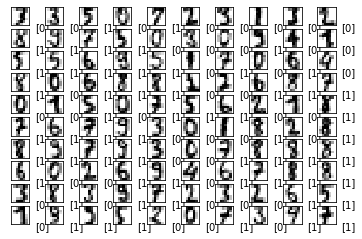

In [885]:
# Vilizating the test data
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(X_test[i].reshape([8,8]), cmap=plt.cm.gray_r)
    plt.text(10,10,str(y_test[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()

##### 5- Merge all functions into a model

Congratulations !! You have finished all the necessary components for constructing a model. Now, Let's take the challenge to merge all the implemented function into one model.

In [886]:
X_train.shape

(1347, 64)

In [897]:
def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate, print_cost):
    """
    Build the logistic regression model by calling all the functions you have implemented.
    Arguments:
    X_train - training set
    Y_train - training label
    X_test - test set
    Y_test - test label
    num_iteration - hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d - dictionary should contain following information w,b,training_accuracy, test_accuracy,cost
    eg: d = {"w":w,
             "b":b,
             "training_accuracy": traing_accuracy,
             "test_accuracy":test_accuracy,
             "cost":cost}
    """
    # 初始化参数
    w, b = initialize_parameters(X_train.shape[1])
    
    # 训练更新num_iterations次
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost=print_cost)
    
    # 获取新的w，b参数
    w, b = params['w'], params['b']
    
    # 预测
    y_train_pred = predict(w, b, X_train)
    y_test_pred = predict(w, b, X_test)
#    print(y_train_pred.shape, y_test_pred.shape, y_train.shape, y_test.shape)
#    print((y_train_pred.T - y_train).shape)
    
    # 参数
    metrics = {"costs": costs, 
               "grads": grads,
              "y_train_pred": y_train_pred,
              "y_test_pred": y_test_pred,
              "w": w,
              "b": b,
              "train_accu": (1 - np.mean(np.abs(y_train_pred.T - y_train))) * 100, 
              "test_accu": (1 - np.mean(np.abs(y_test_pred.T - y_test))) * 100}
    
#    print ("Train accuracy: {} %".format(metrics["train_accu"]))
#    print ("Test accuracy: {} %".format(metrics["test_accu"]))
    return metrics

In [894]:
metrics = model(X_train, y_train, X_test, y_test, 50000, 0.005, True)

Cost after iteration 0: 7.909388
Cost after iteration 100: 4.620362
Cost after iteration 200: 3.285112
Cost after iteration 300: 2.402336
Cost after iteration 400: 1.929129
Cost after iteration 500: 1.600369
Cost after iteration 600: 1.369011
Cost after iteration 700: 1.210185
Cost after iteration 800: 1.095350
Cost after iteration 900: 1.006349
Cost after iteration 1000: 0.934039
Cost after iteration 1100: 0.873593
Cost after iteration 1200: 0.822006
Cost after iteration 1300: 0.776909
Cost after iteration 1400: 0.737203
Cost after iteration 1500: 0.702043
Cost after iteration 1600: 0.670786
Cost after iteration 1700: 0.642969
Cost after iteration 1800: 0.618045
Cost after iteration 1900: 0.595566
Cost after iteration 2000: 0.575194
Cost after iteration 2100: 0.556627
Cost after iteration 2200: 0.539580
Cost after iteration 2300: 0.523804
Cost after iteration 2400: 0.509106
Cost after iteration 2500: 0.495348
Cost after iteration 2600: 0.482431
Cost after iteration 2700: 0.470282
Cost

Cost after iteration 23700: 0.242958
Cost after iteration 23800: 0.242924
Cost after iteration 23900: 0.242890
Cost after iteration 24000: 0.242856
Cost after iteration 24100: 0.242823
Cost after iteration 24200: 0.242789
Cost after iteration 24300: 0.242755
Cost after iteration 24400: 0.242721
Cost after iteration 24500: 0.242687
Cost after iteration 24600: 0.242654
Cost after iteration 24700: 0.242620
Cost after iteration 24800: 0.242586
Cost after iteration 24900: 0.242552
Cost after iteration 25000: 0.242519
Cost after iteration 25100: 0.242485
Cost after iteration 25200: 0.242451
Cost after iteration 25300: 0.242417
Cost after iteration 25400: 0.242383
Cost after iteration 25500: 0.242349
Cost after iteration 25600: 0.242315
Cost after iteration 25700: 0.242281
Cost after iteration 25800: 0.242246
Cost after iteration 25900: 0.242212
Cost after iteration 26000: 0.242178
Cost after iteration 26100: 0.242143
Cost after iteration 26200: 0.242109
Cost after iteration 26300: 0.242074
C

Cost after iteration 45900: 0.234160
Cost after iteration 46000: 0.234126
Cost after iteration 46100: 0.234093
Cost after iteration 46200: 0.234060
Cost after iteration 46300: 0.234026
Cost after iteration 46400: 0.233993
Cost after iteration 46500: 0.233960
Cost after iteration 46600: 0.233927
Cost after iteration 46700: 0.233895
Cost after iteration 46800: 0.233862
Cost after iteration 46900: 0.233829
Cost after iteration 47000: 0.233797
Cost after iteration 47100: 0.233765
Cost after iteration 47200: 0.233732
Cost after iteration 47300: 0.233700
Cost after iteration 47400: 0.233668
Cost after iteration 47500: 0.233636
Cost after iteration 47600: 0.233605
Cost after iteration 47700: 0.233573
Cost after iteration 47800: 0.233541
Cost after iteration 47900: 0.233510
Cost after iteration 48000: 0.233479
Cost after iteration 48100: 0.233447
Cost after iteration 48200: 0.233416
Cost after iteration 48300: 0.233385
Cost after iteration 48400: 0.233354
Cost after iteration 48500: 0.233324
C

In [895]:
metrics["train_accu"], metrics["test_accu"]

(91.75946547884188, 88.44444444444444)

### 4.选做题

Congratulations on building your first logistic regression model. It is your time to analyze it further.

##### 4.1 Observe the effect of learning rate on the leraning process.   
Hits: plot the learning curve with different learning rate

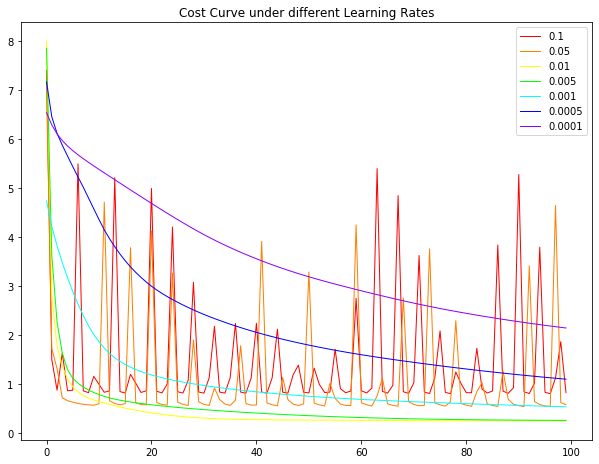

In [908]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10.24, 7.68))
for lr, color in zip([0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001],["#FF0000", "#FF7F00", "#FFFF00", "#00FF00", "#00FFFF", "#0000FF", "#8B00FF"]):
    metrics = model(X_train, y_train, X_test, y_test, 10000, lr, False)
    plt.plot(metrics["costs"], linewidth = '1', label = str(lr), color=color)
    plt.legend(loc='upper right')
plt.title("Cost Curve under different Learning Rates")
plt.show()

如上图所示，黄色的应该是最好的，也就是 learning_rate = 0.01

##### 4.2 Observe the effect of iteration_num on the test accuracy.

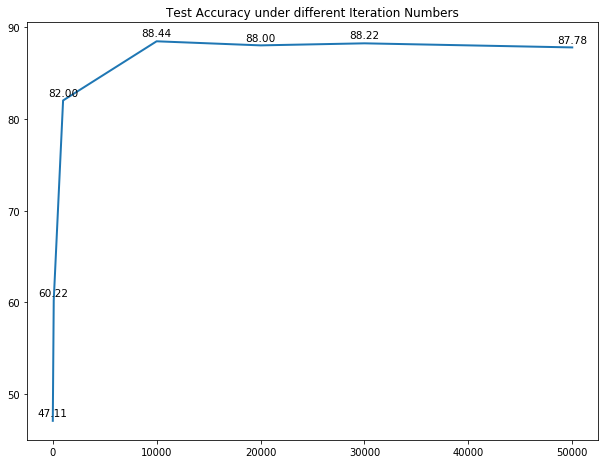

In [914]:
plt.figure(figsize=(10.24, 7.68))
x = [10, 100, 1000, 10000, 20000, 30000, 50000]
y = list()
for i in x:
    metrics = model(X_train, y_train, X_test, y_test, i, 0.01, False)
    y.append(metrics["test_accu"])
plt.plot(x, y, linewidth = '2')
plt.title("Test Accuracy under different Iteration Numbers")
for x, y in zip(x,y):
    plt.text(x, y+0.3, '%.2f'%y, ha='center', va='bottom', fontsize=10.5)
plt.show()

10000 次过后可能有点过拟合了

# Challenge ! ! !

The original data have images labeled 0,1,2,3,4,5,6,7,8,9. In our logistic model, we only detect if the digit in the image is larger or smaller than 5. Now, Let's go for a more challenging problem. Try to use softmax function to build a model to recognize which digits (0,1,2,3,4,5,6,7,8,9) is in the image.

In [928]:
from tensorflow.keras.utils import to_categorical

C:\Users\yihua\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [929]:
# Split the data into training set and test set 
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.25)

In [931]:
to_categorical(y_train), to_categorical(y_test)

(array([[0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        ...,
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 1., ..., 0., 0., 0.]], dtype=float32))

In [ ]:
def softmax(x):
    numerator = np.exp(x)
    denominator = np.exp(x).sum()
    return numerator/denominator

##### Mathematical expression of the algorithm:

For one example $x^{(i)}$:   
 $$ z^{(i)} = w^T * x^{(i)} +b $$   
 $$ y^{(i)} = a^{(i)} = softmax(z^{(i)})$$   
 $$L(a^{(i)},y^{(i)}) = -y^{(i)} log(a^{(i)})-(1-y^{(i)})log(1-a^{(i)})$$

The total cost over all training examples:
$$ J = \frac{1}{m}\sum_{i=1}^{m}L(a^{(i)},y^{(i)}) $$

#### 4 - Building the algorithm

##### 4.1- Activation function    


# Congratulations ! You have completed assigment 4. 